In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Script to line charts for the coverage rates

Created on Fri Apr 16 20:54:23 2021

@author: jeremylhour
"""
import yaml
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
########## LOAD MAIN CONFIG ##########
config_file = '../DGP_exponential/EXPONENTIAL_config.yml'

with open(config_file, 'r') as stream:
    config = yaml.safe_load(stream)

B = config['nb_simu']

lambda_x = sorted(config['lambda_x'], reverse=True)
b2 = [round(1 - i, 2) for i in lambda_x]

alpha_y = sorted(config['alpha_y'], reverse=False)
d2 = [round(1/i, 2) for i in alpha_y]
# NB : in this application, lambda_Z = 1

########## PARAMETERS ##########
metric = 'Coverage rate'
models = [
    'standard_kernel',
    'standard_xavier',
    'smooth_kernel',
    'smooth_ls',
    'smooth_xavier'
    ]
sample_size = config['sample_size'][-1]

########## EXTRACT COVERAGE RATES ##########
coverageRates = []
for index_y in alpha_y:
    for index_x in lambda_x:
        pickle_file = '../output/raw/simulations_B='+str(B)+'_lambda_x='+str(index_x)+'_lambda_z=1_alpha_y='+str(index_y)+'.p'
        try:
            result = pickle.load(open(pickle_file,'rb'))
            dico = {'bd_sum': 1-index_x + 1/index_y,
                   "bootstrap": result[sample_size]['Bootstrap cov. rate']
                   }
            for model in models:
                dico[model] = result[sample_size][metric][model]
            coverageRates.append(dico)
        except:
            pass

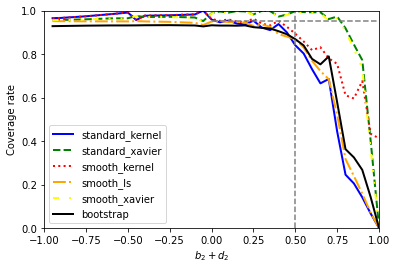

In [9]:
########## AVERAGE OVER VALUES OF b_2+d_2 ##########
df = pd.DataFrame(coverageRates)
df['bd_sum'] = round(df['bd_sum'], 2) # pour gérer les approximations
dataForPlot = df.groupby('bd_sum').mean()

########## DRAW THE CHART ##########
col_dico = {
    'standard_kernel': 'blue',
    'standard_xavier': 'green',
    'smooth_kernel': 'red',
    'smooth_ls': 'orange',
    'smooth_xavier': 'yellow',
    'bootstrap': 'black'
    }

lt_dico = {
    'standard_kernel': 'solid',
    'standard_xavier': 'dashed',
    'smooth_kernel': 'dotted',
    'smooth_ls': 'dashdot',
    'smooth_xavier': (0, (3, 5, 1, 5, 1, 5)),
    'bootstrap': "solid"
    }

for model in models+['bootstrap']:
    plt.plot(model, data=dataForPlot, color=col_dico[model], linestyle=lt_dico[model], marker='', markersize=12, linewidth=2)

plt.plot((0, 1), (.95, .95), color='grey', linestyle='dashed')
plt.plot((.5, .5), (0, 1), color='grey', linestyle='dashed')
plt.xlim([-1, 1])
plt.ylim([0, 1])
plt.legend()
plt.xlabel(r'$b_2+d_2$')
plt.ylabel('Coverage rate')

plt.savefig('EXPONENTIAL_line_chart.png', dpi=600)

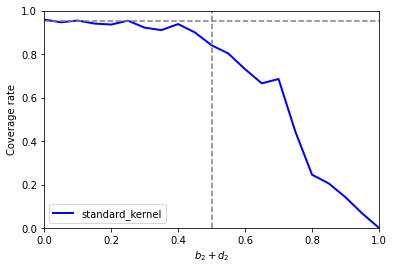

In [7]:
model = 'standard_kernel'
plt.plot(model, data=dataForPlot, color=col_dico[model], linestyle=lt_dico[model], marker='', markersize=12, linewidth=2)

plt.plot((0, 1), (.95, .95), color='grey', linestyle='dashed')
plt.plot((.5, .5), (0, 1), color='grey', linestyle='dashed')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.xlabel(r'$b_2+d_2$')
plt.ylabel('Coverage rate')

plt.savefig('EXPONENTIAL_line_chart.png', dpi=600)